<a href="https://colab.research.google.com/github/TearG/ProgramariaAlura/blob/main/desafios_Meteora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Alt text: Slogan da Meteora.](https://i.imgur.com/VDYh2G1.png)

# 1. Estruturando a tabela

**Meteora** é uma loja que vende roupas e acessórios de diversas marcas por todos os estados do Brasil, para entender suas bases de dados e exibir informações relevantes com o objetivo de auxiliar suas tomadas de decisão.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, text

**Sobre as tabelas**

* itens_pedidos: tabela que informa sobre o que foi vendido, vai ter informação o preço, quantidade, para onde vai ser enviado e o frete do pedido
* pedidos: vai falar sobre a venda feita, tendo informação sobre os vendedores, preço do pedido e a data da venda
* produtos: informa características dos produtos que são comercializados na loja
* vendedores: informa o nome dos vendedores.

In [ ]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

In [ ]:
#Essas linhas de código estão carregando dados de quatro arquivos CSV diferentes,
#cada um contendo informações sobre um aspecto da loja (itens de pedidos, pedidos, produtos e vendedores).
#Os dados de cada arquivo são lidos e organizados em DataFrames do pandas,
#que são armazenados em variáveis com nomes correspondentes.
#Isso permite que você acesse e trabalhe com esses dados de forma estruturada dentro do seu código Python,
#usando as ferramentas e funcionalidades do pandas.
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produtos = pd.read_csv(url_produto)
vendedores = pd.read_csv(url_vendedores)

In [ ]:
# Colocando os bancos em memória local
engine = create_engine('sqlite:///:memory:')

In [ ]:
#Pegue os dados do DataFrame do pandas chamado produtos e crie uma nova tabela chamada 'produtos' no banco de dados SQLite usando a conexão engine. Não inclua o índice do DataFrame na tabela."
produtos.to_sql('produtos', engine, index=False)

205

In [ ]:
itens_pedidos.to_sql('itens_pedidos', engine, index=False)
pedidos.to_sql('pedidos', engine, index=False)
vendedores.to_sql('vendedores', engine, index=False)

5

In [ ]:
#O código primeiro cria um "inspetor" para o seu banco de dados e, em seguida,
#usa esse inspetor para obter uma lista com os nomes de todas as tabelas.
#Por fim, ele imprime essa lista na tela.
inspector = inspect(engine)
print(inspector.get_table_names())

['itens_pedidos', 'pedidos', 'produtos', 'vendedores']


# Desafio 1: receita total das vendas de itens

Foi feita a seleção da coluna valor_total da tabela itens_pedidos em uma query enviada na função sql_df. A receita é calculada com a soma dos valores na coluna valor_total. O valor de receita é numérico.

In [ ]:
def sql_df(query):
   with engine.connect() as conexao:
    consulta = conexao.execute(text(query))
    dados = consulta.fetchall()
   return pd.DataFrame(dados, columns=consulta.keys())

In [ ]:
df_itens_pedidos = sql_df('SELECT VALOR_TOTAL FROM ITENS_PEDIDOS')
receita = df_itens_pedidos['valor_total'].sum()
receita

45803930

Uma outra opção é usar a função de agregação SUM() do SQL aplicada à coluna valor_total.

In [ ]:
query = '''SELECT SUM(VALOR_TOTAL) AS RECEITA
FROM ITENS_PEDIDOS;
'''
df_itens_pedidos = sql_df(query)
df_itens_pedidos

,RECEITA
0,45803930


# Desafio 2: 15 marcas mais pedidas

Foram selecionadas as marcas na tabela PRODUTOS e agrupamos elas por frequência através da função COUNT e, para obter as marcas mais vendidas, relacionamos as tabelas PRODUTOS e ITENS_PEDIDOS. O agrupamento é feito pelas marcas e ordenando os dados das tabelas.

Depois, foi feita a plotagem da visualização mostrando as 15 marcas mais vendidas na Meteora.

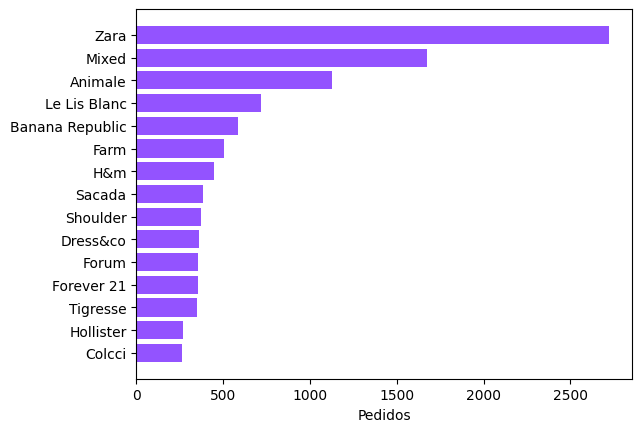

In [ ]:
query = '''SELECT PRODUTOS.MARCA, COUNT (*) AS 'Pedidos'
FROM PRODUTOS, ITENS_PEDIDOS
WHERE PRODUTOS.PRODUTO_ID = ITENS_PEDIDOS.PRODUTO_ID
GROUP BY PRODUTOS.MARCA
ORDER BY COUNT(*) ASC;
'''
df_marcas = sql_df(query)

plt.barh(df_marcas['marca'][-15:], df_marcas['Pedidos'][-15:], color = '#9353FF')
plt.xlabel('Pedidos')
plt.show()

# Desafio 3: 10 produtos mais vendidos em 2019

Inicia-se selecionando os produtos da tabela "produtos" e contando quantos pedidos existem para cada produto. Em seguida, são filtrados os resultados apenas para os pedidos feitos no ano de 2019 com strftime('%Y', data_compra) = '2019' no WHERE. Depois, os dados são agrupados por produto, ou seja, todos os pedidos relacionados a um mesmo produto são agrupados. Para que o produto mais popular apareça primeiro, os resultados são ordenados de acordo com o número total de pedidos em ordem decrescente. Por fim, a consulta retorna apenas os 10 produtos mais populares em 2019 com LIMIT.

In [ ]:
query = '''SELECT PRODUTOS.PRODUTO, COUNT (PEDIDOS.PEDIDO_ID) AS TOTAL_PEDIDOS
FROM PEDIDOS, PRODUTOS
WHERE strftime('%Y', data_compra) = '2019' AND PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
GROUP BY PRODUTOS.PRODUTO
ORDER BY TOTAL_PEDIDOS DESC
LIMIT 10;
'''
sql_df(query)

,produto,TOTAL_PEDIDOS
0,Vestido Recortes Cores,85
1,Calca Jeans Costuras,81
2,Saia Pregas Preta,73
3,Calca Alfaiataria Preta,66
4,Camisa Xadrez Azul,60
5,Bomber Tricot Off,56
6,Shorts Bordado Branco,55
7,Blusa Manga Estampa,54
8,Saia Midi Cinto,53
9,Saia Evase Cinza,53


# Desafio 4: distribuição da receita por mês em 2021

A consulta seleciona o mês da coluna data_compra formatado como %m usando a função strftime e o renomeia como mes. Em seguida, é calculado o total das receitas utilizando a função SUM e esse cálculo é renomeado como receita. Essa soma é feita com base na coluna total. A cláusula WHERE é utilizada para filtrar os dados apenas para o ano de 2021. A função strftime é novamente utilizada para extrair o ano (%Y) da coluna data_compra e compará-lo com o valor '2021'. Os resultados são então agrupados por mês, utilizando a cláusula GROUP BY mes

In [ ]:
query = '''SELECT strftime('%m', data_compra) AS mes, SUM(total) AS receita
FROM pedidos
WHERE strftime('%Y', data_compra) = '2021'
GROUP BY mes;
'''
sql_df(query)

,mes,receita
0,01,2097109
1,02,1140729
2,03,51525


# Desafio 5: marcas em São Paulo por quantidade de pedidos

Primeiro, é selecionada a coluna de MARCA da tabela PRODUTOS e contada a quantidade de registros. Depois, é executado um JOIN entre as tabelas PRODUTOS e ITENS_PEDIDOS, ligando-as pelo campo PRODUTO_ID. É aplicado um filtro com WHERE para considerar apenas os registros em que o estado é São Paulo ('BR-SP'). Os dados são finalmente agrupados pela coluna MARCA e ordenados em ordem decrescente com base na contagem de produtos vendidos. O resultado é uma tabela contendo uma lista ordenada das marcas com maior número de produtos vendidos.

In [ ]:
query = '''SELECT PRODUTOS.MARCA, COUNT(*) AS 'Produtos vendidos'
FROM PRODUTOS
JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
GROUP BY PRODUTOS.MARCA
ORDER BY COUNT(ITENS_PEDIDOS.PRODUTO_ID) DESC;
'''
df_marcas_sp = sql_df(query)
df_marcas_sp

,marca,Produtos vendidos
0,Zara,100
1,Mixed,58
2,Animale,44
3,Le Lis Blanc,26
4,Banana Republic,18
...,...,...
111,Topshop,1
112,Morena Rosa,1
113,Erre Erre,1
114,Bobô,1


# Desafio 6: produtos mais vendidos em dezembro no Brasil

A consulta executa a seleção da coluna de PRODUTO da tabela PRODUTOS e conta a quantidade de registros. Em seguida, é realizado um JOIN entre as tabelas PRODUTOS e ITENS_PEDIDOS, ligando-as pelo campo PRODUTO_ID e outro JOIN com a tabela PEDIDOS, ligando-a pelo campo PEDIDO_ID. Aplica-se um filtro para considerar apenas os pedidos feitos no mês de dezembro, utilizando a função strftime para extrair o mês da data (%m) de compra e compará-lo com '12'.

Por fim, os dados são agrupados pelos produtos e ordenados em ordem decrescente com base na quantidade de vendas. Como retorno, temos uma tabela com a contagem de vendas de cada produto de todos os pedidos realizados em dezembro.

In [ ]:
query = '''SELECT PRODUTOS.PRODUTO, COUNT(*) AS quantidade_vendas
FROM ITENS_PEDIDOS
JOIN produtos ON produtos.produto_id = ITENS_PEDIDOS.produto_id
JOIN PEDIDOS ON PEDIDOS.PEDIDO_ID = ITENS_PEDIDOS.PEDIDO_ID
WHERE strftime('%m',PEDIDOS.data_compra)= '12'
GROUP BY produtos.produto
ORDER BY quantidade_vendas DESC;
'''
sql_df(query)

,produto,quantidade_vendas
0,Vestido Recortes Cores,30
1,Vestido Preto Franzido,26
2,Calca Jeans Costuras,26
3,Calca Alfaiataria Preta,26
4,Camisa Xadrez Azul,25
...,...,...
196,Sneaker Monograma Bege,6
197,Casaqueto Estampa Geometrica,6
198,Regata Renda Branca,5
199,Body Estampa Coracoes,5
